In [79]:
# Importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Preparation

In [34]:
# Reading the csv file
df=pd.read_csv("data/data-2018-01-14-neworleans.csv")
df.head()

,match id,series id,end time,duration (s),mode,map,team,player,win?,score,kills,deaths,+/-,k/d,kills per 10min,deaths per 10min,assists,headshots,suicides,team kills,team deaths,kills (stayed alive),hits,shots,accuracy (%),num lives,time alive (s),avg time per life (s),fave weapon,fave division,fave training,fave scorestreaks,hill time (s),hill captures,hill defends,snd rounds,snd firstbloods,snd firstdeaths,snd survives,bomb pickups,bomb plants,bomb defuses,bomb sneak defuses,snd 1-kill round,snd 2-kill round,snd 3-kill round,snd 4-kill round,ctf captures,ctf returns,ctf pickups,ctf defends,ctf kill carriers,ctf flag carry time (s),2-piece,3-piece,4-piece,4-streak,5-streak,6-streak,7-streak,8+-streak,scorestreaks earned,scorestreaks used,scorestreaks deployed,scorestreaks kills,scorestreaks assists
0,56925b97-0ea7-5d64-b76b-829c30867fee,pool-B-4,2018-01-12 20:17:50 UTC,578,Hardpoint,Sainte Marie du Mont,Team EnVyUs,Classic,W,250,25,22,3,1.14,26.0,22.8,9,2,0,0,0,16,71,256,27.7%,23,533.5,23.2,BAR,Infantry,Hunker,"Fighter Pilot, Glide Bomb, Flamethrower",106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5,0,0,0,1,1,0,0,3,3,4,5,0
1,56925b97-0ea7-5d64-b76b-829c30867fee,pool-B-4,2018-01-12 20:17:50 UTC,578,Hardpoint,Sainte Marie du Mont,Team EnVyUs,Huke,W,250,32,21,11,1.52,33.2,21.8,12,2,0,0,0,24,138,535,25.8%,22,535.0,24.3,PPSh-41,Airborne,Hunker,"Fighter Pilot, Glide Bomb, Flamethrower",42,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3,0,0,2,0,0,0,0,2,2,2,2,0
2,56925b97-0ea7-5d64-b76b-829c30867fee,pool-B-4,2018-01-12 20:17:50 UTC,578,Hardpoint,Sainte Marie du Mont,Team EnVyUs,Slasher,W,250,32,23,9,1.39,33.2,23.9,13,1,0,0,0,22,98,370,26.5%,24,531.1,22.1,BAR,Infantry,Hunker,"Fighter Pilot, Glide Bomb, Artillery Barrage",56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5,1,0,1,0,0,1,0,2,2,2,3,0
3,56925b97-0ea7-5d64-b76b-829c30867fee,pool-B-4,2018-01-12 20:17:50 UTC,578,Hardpoint,Sainte Marie du Mont,Team EnVyUs,Temp,W,250,21,15,6,1.40,21.8,15.6,8,1,0,0,0,18,65,274,23.7%,16,547.4,34.2,PPSh-41,Airborne,Hunker,"Fighter Pilot, Glide Bomb, Flamethrower",97,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2,0,0,1,2,0,0,0,5,3,8,3,1
4,56925b97-0ea7-5d64-b76b-829c30867fee,pool-B-4,2018-01-12 20:17:50 UTC,578,Hardpoint,Sainte Marie du Mont,Team Vitality,Malls,L,145,24,29,-5,0.83,24.9,30.1,9,1,0,0,0,18,100,391,25.6%,30,519.9,17.3,PPSh-41,Airborne,Hunker,"Fighter Pilot, Glide Bomb, Flamethrower",57,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5,0,0,1,1,0,0,0,1,1,1,2,0


In [36]:
# Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   match id                 2240 non-null   object 
 1   series id                2240 non-null   object 
 2   end time                 2240 non-null   object 
 3   duration (s)             2240 non-null   int64  
 4   mode                     2240 non-null   object 
 5   map                      2240 non-null   object 
 6   team                     2240 non-null   object 
 7   player                   2240 non-null   object 
 8   win?                     2240 non-null   object 
 9   score                    2240 non-null   int64  
 10  kills                    2240 non-null   int64  
 11  deaths                   2240 non-null   int64  
 12  +/-                      2240 non-null   int64  
 13  k/d                      2240 non-null   float64
 14  kills per 10min         

In [37]:
# Summary of numerical columns
df.describe()

,duration (s),score,kills,deaths,+/-,k/d,kills per 10min,deaths per 10min,assists,headshots,suicides,team kills,team deaths,kills (stayed alive),hits,shots,num lives,time alive (s),avg time per life (s),hill time (s),hill captures,hill defends,snd rounds,snd firstbloods,snd firstdeaths,snd survives,bomb pickups,bomb plants,bomb defuses,bomb sneak defuses,snd 1-kill round,snd 2-kill round,snd 3-kill round,snd 4-kill round,ctf captures,ctf returns,ctf pickups,ctf defends,ctf kill carriers,ctf flag carry time (s),2-piece,3-piece,4-piece,4-streak,5-streak,6-streak,7-streak,8+-streak,scorestreaks earned,scorestreaks used,scorestreaks deployed,scorestreaks kills,scorestreaks assists
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.00000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,608.682143,92.453571,17.600446,17.600446,0.000000,1.093960,16.917411,16.917902,5.406696,1.124107,0.020536,0.214286,0.193750,12.589286,73.250893,318.03750,19.503571,495.790357,30.144554,26.511607,0.0,0.427232,2.996429,0.373214,0.374554,0.911607,0.467411,0.207589,0.066518,0.0,0.973661,0.387054,0.095089,0.012946,0.164286,0.160714,0.449107,0.249554,0.271429,5.682589,1.967857,0.210268,0.016518,0.389286,0.148214,0.073214,0.031250,0.029018,0.729018,0.631250,0.699554,0.584821,0.058929
std,103.624890,109.076736,10.041259,9.636108,6.356605,0.648485,8.806779,8.339137,5.883812,1.190160,0.141855,0.503291,0.471574,7.206150,39.884878,173.33483,9.074255,114.844380,12.591993,36.922729,0.0,0.881080,4.356181,0.815765,0.787562,1.560525,1.122991,0.606085,0.268229,0.0,1.643188,0.817251,0.343865,0.120711,0.505240,0.493885,1.037957,0.658710,0.742078,18.537701,1.859236,0.494708,0.130941,0.675793,0.403642,0.275542,0.179091,0.170533,1.379767,1.230005,1.447426,1.353520,0.272469
min,245.000000,0.000000,0.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,12.00000,4.000000,127.800000,12.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,557.000000,3.000000,8.000000,8.000000,-4.000000,0.750000,8.800000,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,34.000000,159.75000,10.000000,422.900000,20.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,605.000000,6.000000,18.000000,18.000000,0.000000,1.000000,17.000000,17.400000,3.000000,1.000000,0.000000,0.000000,0.000000,12.000000,77.000000,316.50000,20.000000,489.150000,25.350000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,669.000000,223.000000,25.000000,25.000000,3.250000,1.270000,23.900000,23.900000,10.000000,2.000000,0.000000,0.000000,0.000000,18.000000,103.000000,443.00000,27.000000,587.525000,38.300000,54.000000,0.0,1.000000,8.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0

In [38]:
# How many cells are blank in each column
df.isna().sum()

match id                   0
series id                  0
end time                   0
duration (s)               0
mode                       0
map                        0
team                       0
player                     0
win?                       0
score                      0
kills                      0
deaths                     0
+/-                        0
k/d                        0
kills per 10min            0
deaths per 10min           0
assists                    0
headshots                  0
suicides                   0
team kills                 0
team deaths                0
kills (stayed alive)       0
hits                       0
shots                      0
accuracy (%)               0
num lives                  0
time alive (s)             0
avg time per life (s)      0
fave weapon                0
fave division              0
fave training              0
fave scorestreaks          0
hill time (s)              0
hill captures              0
hill defends  

In [39]:
# Drop match id and end time
df = df.drop(["match id", "end time"], axis=1)
df.head(2)

,series id,duration (s),mode,map,team,player,win?,score,kills,deaths,+/-,k/d,kills per 10min,deaths per 10min,assists,headshots,suicides,team kills,team deaths,kills (stayed alive),hits,shots,accuracy (%),num lives,time alive (s),avg time per life (s),fave weapon,fave division,fave training,fave scorestreaks,hill time (s),hill captures,hill defends,snd rounds,snd firstbloods,snd firstdeaths,snd survives,bomb pickups,bomb plants,bomb defuses,bomb sneak defuses,snd 1-kill round,snd 2-kill round,snd 3-kill round,snd 4-kill round,ctf captures,ctf returns,ctf pickups,ctf defends,ctf kill carriers,ctf flag carry time (s),2-piece,3-piece,4-piece,4-streak,5-streak,6-streak,7-streak,8+-streak,scorestreaks earned,scorestreaks used,scorestreaks deployed,scorestreaks kills,scorestreaks assists
0,pool-B-4,578,Hardpoint,Sainte Marie du Mont,Team EnVyUs,Classic,W,250,25,22,3,1.14,26.0,22.8,9,2,0,0,0,16,71,256,27.7%,23,533.5,23.2,BAR,Infantry,Hunker,"Fighter Pilot, Glide Bomb, Flamethrower",106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5,0,0,0,1,1,0,0,3,3,4,5,0
1,pool-B-4,578,Hardpoint,Sainte Marie du Mont,Team EnVyUs,Huke,W,250,32,21,11,1.52,33.2,21.8,12,2,0,0,0,24,138,535,25.8%,22,535.0,24.3,PPSh-41,Airborne,Hunker,"Fighter Pilot, Glide Bomb, Flamethrower",42,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3,0,0,2,0,0,0,0,2,2,2,2,0


# Business Intelligence

In [40]:
# Which players had the best kd
df.groupby("player")["k/d"].sum().sort_values(ascending=False).head(10)

player
Octane      56.10
Methodz     53.09
JKap        49.38
John        46.74
Loony       45.63
Chino       45.41
Kenny       44.67
Accuracy    44.67
TJHaly      44.28
Slacked     42.76
Name: k/d, dtype: float64

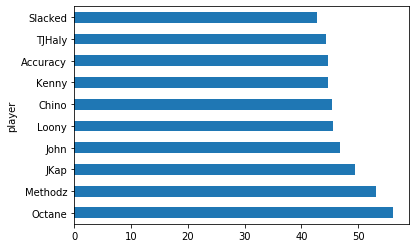

In [50]:
# Which players had the best kd
df.groupby("player")["k/d"].sum().sort_values(ascending=False).head(10).plot(kind="barh")

In [41]:
# Which teams had the most wins
df.groupby("team")["win?"].size().sort_values(ascending=False)

team
Luminosity Gaming    172
Rise Nation          156
Team Kaliber         152
Red Reserve          128
eUnited              120
Enigma6              112
FaZe Clan            112
Lightning Pandas     112
Evil Geniuses        108
Echo Fox             108
Splyce               104
Mindfreak             96
Unilad                96
Team EnVyUs           92
OpTic Gaming          84
Team Vitality         80
Complexity Gaming     76
GGEA Orange           72
GGEA Blue             68
Epsilon               68
DooM                  60
InControl Gaming      36
Millenium             16
EZG                   12
Name: win?, dtype: int64

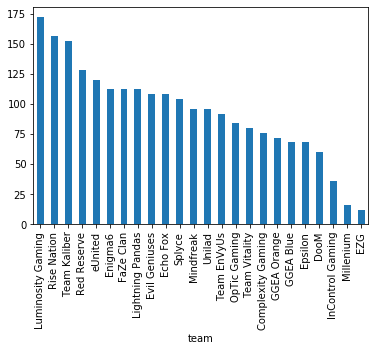

In [59]:
# Which teams had the most wins
df.groupby("team")["win?"].size().sort_values(ascending=False).plot(kind='bar')


In [42]:
# Which map had the most wins
df.groupby("map")["win?"].size().sort_values(ascending=False)

map
Ardennes Forest         832
London Docks            592
Sainte Marie du Mont    408
USS Texas               144
Gibraltar               136
Flak Tower              128
Name: win?, dtype: int64

In [43]:
# Which weapons were most used for each map
df.groupby(["map", "fave weapon"]).size()

map                   fave weapon
Ardennes Forest       BAR            152
                      FG 42           60
                      Kar98k          17
                      PPSh-41        385
                      STG-44         218
Flak Tower            BAR             15
                      FG 42            1
                      PPSh-41        103
                      STG-44           9
Gibraltar             BAR             40
                      FG 42            6
                      PPSh-41         62
                      STG-44          28
London Docks          BAR            104
                      FG 42           18
                      Kar98k          18
                      PPSh-41        333
                      STG-44         119
Sainte Marie du Mont  BAR             76
                      FG 42            2
                      PPSh-41        263
                      STG-44          67
USS Texas             BAR             28
                      F

In [44]:
# Which weapons were most used for each gamemode
df.groupby(["mode", "fave weapon"]).size()

mode              fave weapon
Capture The Flag  BAR             81
                  FG 42           11
                  PPSh-41        370
                  STG-44         106
Hardpoint         BAR            172
                  FG 42           34
                  PPSh-41        562
                  STG-44         168
Search & Destroy  BAR            162
                  FG 42           46
                  Kar98k          64
                  PPSh-41        277
                  STG-44         187
dtype: int64

In [45]:
# Distribution of scores
df['score'].describe()

count    2240.000000
mean       92.453571
std       109.076736
min         0.000000
25%         3.000000
50%         6.000000
75%       223.000000
max       250.000000
Name: score, dtype: float64

In [46]:
# Which player had the overall highest average score for all matches
df.groupby("player")["score"].mean().sort_values(ascending=False).head(10)

player
mosh       112.000000
Blfire     112.000000
Havok      112.000000
Legal      112.000000
Scump      107.619048
Crimsix    107.619048
Formal     107.619048
Karma      107.619048
Chino      104.973684
Kenny      104.973684
Name: score, dtype: float64

In [47]:
# Which players had the highest average K/D in games they lost
df[df["win?"] == 'L'].groupby("player")["k/d"].mean().sort_values(ascending=False).head(10)

player
Formal       1.215714
mosh         1.167500
Crimsix      1.140000
Slasher      1.050000
Johnny       1.033333
Parzelion    1.016667
Goonjar      1.014167
Spoof        1.013571
Zayrox       1.007857
MarkyB       0.996667
Name: k/d, dtype: float64

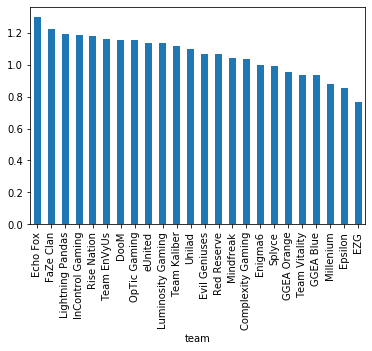

In [63]:
# Which teams had the highest average k/d
df.groupby("team")["k/d"].mean().sort_values(ascending=False).plot(kind='bar')

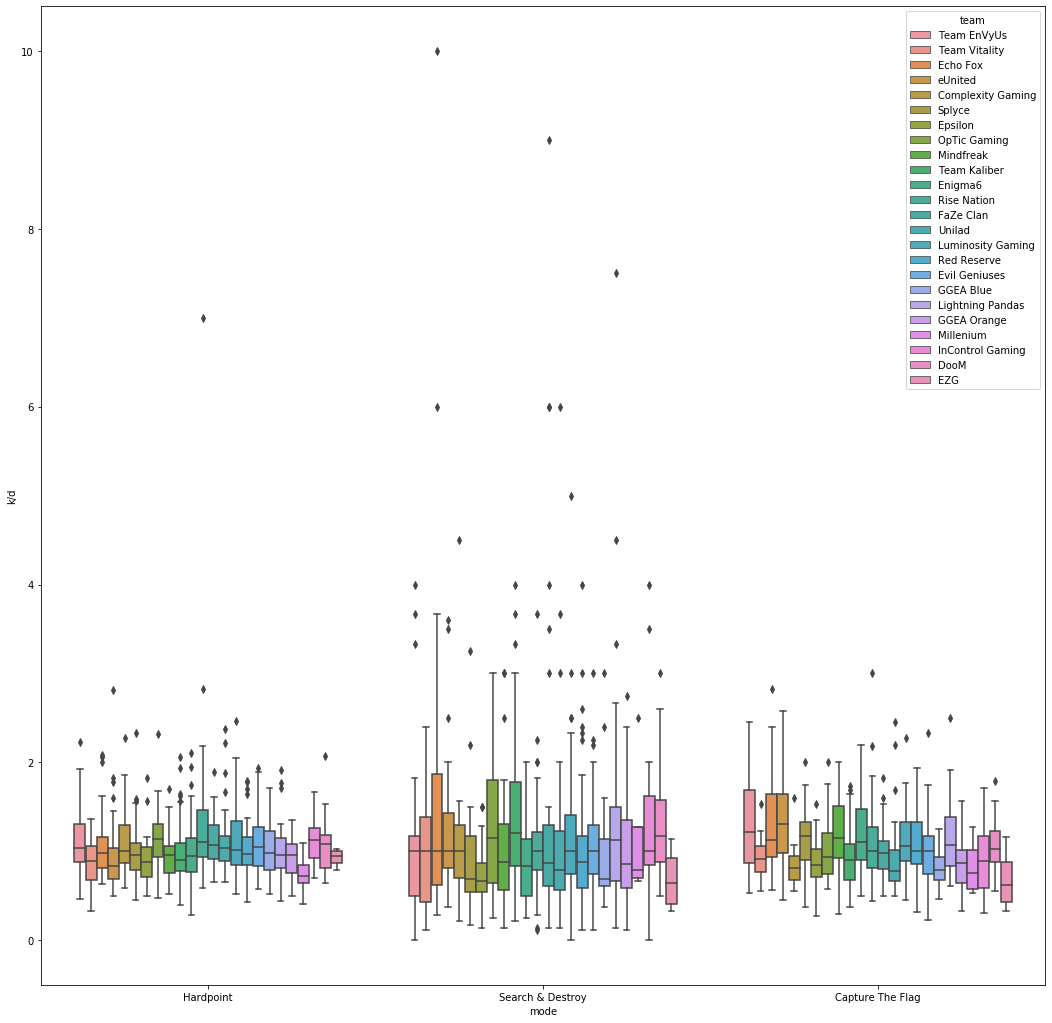

In [84]:
# KD for each team in each mode
dimen = (18, 18)
fig, ax = pyplot.subplots(figsize=dimen)
sns.boxplot(data=df, x="mode", y="k/d", hue="team", ax=ax)


In [120]:
# Created df2 where W and L in "win?" equals 1 and 0
df2 = df.replace({"win?":"W"}, {"win?": 1})
df2 = df2.replace({"win?":"L"}, {"win?": 0})
df2["win?"].value_counts()

1    1120
0    1120
Name: win?, dtype: int64

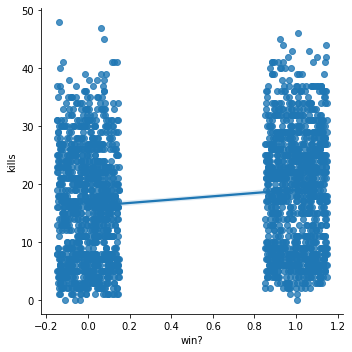

In [123]:
# Relationship between kills and win?
sns.lmplot("win?", "kills", df2, x_jitter=.15)

Positive relationship between kills and wins

In [138]:
# Check for correlation between win and other variables when mode equals Hardpoint
df2[df2["mode"] == "Hardpoint"].corr()["win?"].sort_values(ascending=False)

win?                       1.000000
score                      0.718079
+/-                        0.432686
k/d                        0.400304
avg time per life (s)      0.353617
kills per 10min            0.322042
hill time (s)              0.320719
kills (stayed alive)       0.316897
kills                      0.250552
scorestreaks earned        0.224645
scorestreaks deployed      0.209370
scorestreaks used          0.206473
2-piece                    0.206151
scorestreaks kills         0.195954
5-streak                   0.147666
assists                    0.135690
6-streak                   0.129073
4-streak                   0.128834
hits                       0.118795
3-piece                    0.118251
8+-streak                  0.112273
scorestreaks assists       0.101678
7-streak                   0.087634
shots                      0.079624
4-piece                    0.066523
hill defends               0.065977
time alive (s)             0.051178
suicides                   0

In [142]:
# Check for correlation between win and other variables when mode equals Capture the Flag
df2[df2["mode"] == "Capture The Flag"].corr()["win?"].sort_values(ascending=False)

win?                       1.000000e+00
score                      6.501161e-01
+/-                        5.664505e-01
k/d                        5.522037e-01
avg time per life (s)      5.080329e-01
kills (stayed alive)       4.661266e-01
kills per 10min            4.238018e-01
kills                      3.863278e-01
ctf captures               3.807003e-01
scorestreaks earned        3.558120e-01
scorestreaks deployed      3.447782e-01
scorestreaks used          3.430923e-01
scorestreaks kills         3.175523e-01
4-streak                   2.851918e-01
ctf pickups                2.550896e-01
2-piece                    2.371098e-01
time alive (s)             2.369723e-01
hits                       2.126810e-01
6-streak                   1.893657e-01
ctf flag carry time (s)    1.694476e-01
shots                      1.661489e-01
7-streak                   1.394700e-01
scorestreaks assists       1.392355e-01
5-streak                   1.186873e-01
ctf defends                1.151630e-01


In [140]:
# Check for correlation between win and other variables when mode equals Search & Destroy
df2[df2["mode"] == "Search & Destroy"].corr()["win?"].sort_values(ascending=False)

win?                       1.000000
score                      0.829004
snd survives               0.519284
+/-                        0.435258
k/d                        0.393661
kills (stayed alive)       0.318851
kills per 10min            0.295640
kills                      0.270258
snd 3-kill round           0.194844
bomb defuses               0.158407
scorestreaks earned        0.150881
snd 2-kill round           0.141198
hits                       0.137987
assists                    0.133394
avg time per life (s)      0.131269
2-piece                    0.119368
scorestreaks kills         0.113619
snd firstbloods            0.103526
time alive (s)             0.098553
scorestreaks used          0.087120
scorestreaks deployed      0.087120
shots                      0.083301
snd 1-kill round           0.079426
bomb plants                0.075182
scorestreaks assists       0.052200
headshots                  0.048013
snd 4-kill round           0.045715
4-streak                   0

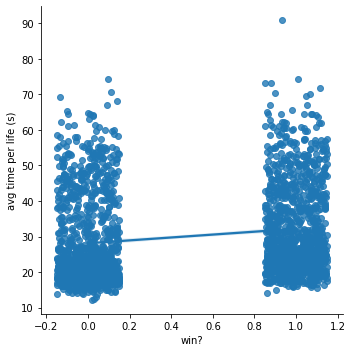

In [145]:
# Relationship between win? and avg time per life
sns.lmplot("win?", "avg time per life (s)", df2, x_jitter=0.15)

# The longer you survive per life in modes Hardpoint and Capture the Flag, there seems to be a slightly higher chance
# of winning

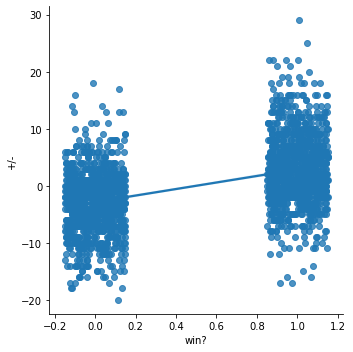

In [151]:
# Win? and +/- (kills minus deaths)
sns.lmplot("win?", "+/-", df2, x_jitter=0.15)

# The more kills generated compared to deaths, the higher the chance of winning

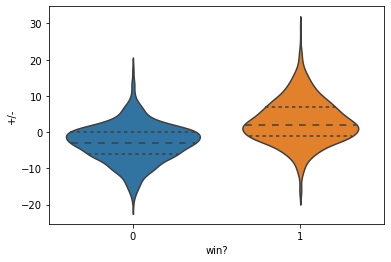

In [150]:
# Another visualization of win? and +/-
sns.violinplot(data=df2, x="win?", y="+/-", split=True, inner="quart")

# Those who lose (win? == 0) tend to have more negative +/- scores than those who win

In [155]:
df2.head(2)

,series id,duration (s),mode,map,team,player,win?,score,kills,deaths,+/-,k/d,kills per 10min,deaths per 10min,assists,headshots,suicides,team kills,team deaths,kills (stayed alive),hits,shots,accuracy (%),num lives,time alive (s),avg time per life (s),fave weapon,fave division,fave training,fave scorestreaks,hill time (s),hill captures,hill defends,snd rounds,snd firstbloods,snd firstdeaths,snd survives,bomb pickups,bomb plants,bomb defuses,bomb sneak defuses,snd 1-kill round,snd 2-kill round,snd 3-kill round,snd 4-kill round,ctf captures,ctf returns,ctf pickups,ctf defends,ctf kill carriers,ctf flag carry time (s),2-piece,3-piece,4-piece,4-streak,5-streak,6-streak,7-streak,8+-streak,scorestreaks earned,scorestreaks used,scorestreaks deployed,scorestreaks kills,scorestreaks assists
0,pool-B-4,578,Hardpoint,Sainte Marie du Mont,Team EnVyUs,Classic,1,250,25,22,3,1.14,26.0,22.8,9,2,0,0,0,16,71,256,27.7%,23,533.5,23.2,BAR,Infantry,Hunker,"Fighter Pilot, Glide Bomb, Flamethrower",106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5,0,0,0,1,1,0,0,3,3,4,5,0
1,pool-B-4,578,Hardpoint,Sainte Marie du Mont,Team EnVyUs,Huke,1,250,32,21,11,1.52,33.2,21.8,12,2,0,0,0,24,138,535,25.8%,22,535.0,24.3,PPSh-41,Airborne,Hunker,"Fighter Pilot, Glide Bomb, Flamethrower",42,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3,0,0,2,0,0,0,0,2,2,2,2,0


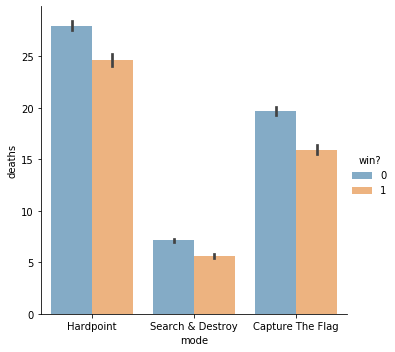

In [163]:
# Deaths for gamemodes and win
sns.catplot(data=df2, kind='bar', x="mode", y="deaths", hue="win?", alpha=0.6)

# For each game mode, deaths appear to be a significant factor in determining a win or loss

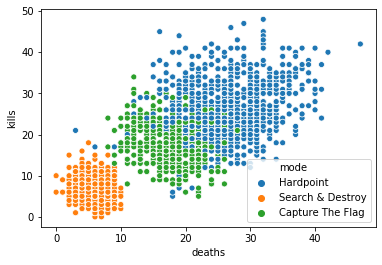

In [188]:
# Kills and deaths for each game mode
sns.scatterplot(x="deaths", y="kills", hue="mode", data=df2)

# Search and Destroy have the least kills and deaths overall, with Capture the Flag next and then Hardpoint
# Each of these makes sense based on the objectives the players try to achieve

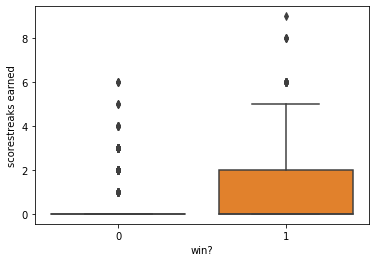

In [170]:
# Relationship between win? and the number of scorestreaks earned
sns.boxplot(data=df2, x="win?", y="scorestreaks earned",)

# Earning more scorestreaks, though not necessarily using them, shows a positive correlation to winning the match

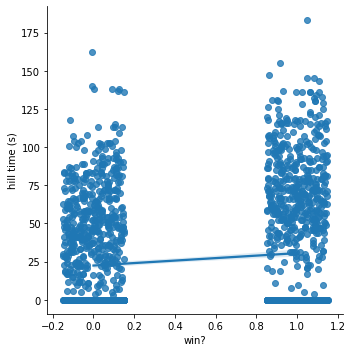

In [185]:
# Relationship between the outcome (win?) and the hill time
sns.lmplot(data=df2, x="win?", y="hill time (s)", x_jitter=0.15)

# Hill time does not seem to be as strongly correlated in determining the outcome of the game compared to +/-

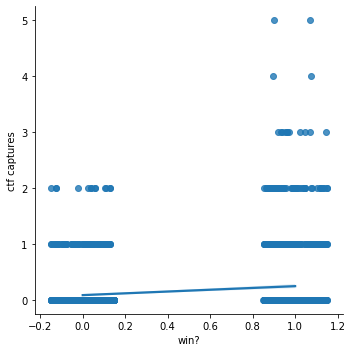

In [186]:
# Relationship between the outcome (win?) and ctf captures
sns.lmplot(data=df2, x="win?", y="ctf captures", x_jitter=0.15)

# ctf captures does not seem to be as strongly correlated in determining the outcome of the game compared to +/-

In [162]:
# All scorestreaks used and their usage percentage
df2["fave scorestreaks"].value_counts() / len(df2)

Fighter Pilot, Glide Bomb, Mortar Strike          0.467411
Fighter Pilot, Glide Bomb, Flamethrower           0.315625
Fighter Pilot, Glide Bomb, Artillery Barrage      0.212054
Fighter Pilot, Glide Bomb, Flak Guns              0.002679
Recon Aircraft, Glide Bomb, Artillery Barrage     0.001339
Fighter Pilot, Flamethrower, Artillery Barrage    0.000893
Name: fave scorestreaks, dtype: float64

In [206]:
# Number of times a "fave scorestreak" was used for each maode and whether they won or not
pd.pivot_table(df2, index="win?", columns=["mode", "fave scorestreaks"], values=["kills"], aggfunc="count", fill_value=0)

# For CTF, the most popular scorestreak was "Fighter Pilot, Glide Bomb, Artillery Barrage"
# For Hardpoint, the most popular scorestreak was "Fighter Pilot, Glide Bomb, Flamethrower"
# For SND, the most popular scorestreak was "Fighter Pilot, Glide Bomb, Mortar Strike"
# Wins do not seem to be correlated with the scorestreak used

kills  \
mode                                            Capture The Flag   
fave scorestreaks Fighter Pilot, Flamethrower, Artillery Barrage   
win?                                                               
0                                                              1   
1                                                              0   

                                                                \
mode                                                             
fave scorestreaks Fighter Pilot, Glide Bomb, Artillery Barrage   
win?                                                             
0                                                           66   
1                                                           67   

                                                        \
mode                                                     
fave scorestreaks Fighter Pilot, Glide Bomb, Flak Guns   
win?                                                     
0                                                    4   
1                                                    1   

                                                           \
mode                                                        
fave scorestreaks Fighter Pilot, Glide Bomb, Flamethrower   
win?                                                        
0                                                      70   
1                                                      60   

                                                            \
mode                                                         
fave scorestreaks Fighter Pilot, Glide Bomb, Mortar Strike   
win?                                                         
0                                                      143   
1                                                      156   

                                                                  \
mode                                                   Hardpoint   
fave scorestreaks Fighter Pilot, Flamethrower, Artillery Barrage   
win?                                                               
0                                                              0   
1                                                              1   

                                                                \
mode                                                             
fave scorestreaks Fighter Pilot, Glide Bomb, Artillery Barrage   
win?                                                             
0                                                           89   
1                                                          106   

                                                        \
mode                                                     
fave scorestreaks Fighter Pilot, Glide Bomb, Flak Guns   
win?                                                     
0                                                    0   
1                                                    1   

                                                           \
mode                                                        
fave scorestreaks Fighter Pilot, Glide Bomb, Flamethrower   
win?                                                        
0                                                     223   
1                                                     201   

                                                            \
mode                                                         
fave scorestreaks Fighter Pilot, Glide Bomb, Mortar Strike   
win?                                                         
0                                                      154   
1                                                      158   

                                                                 \
mode                                                              
fave scorestreaks Recon Aircraft, Glide Bomb, Artillery Barrage   
win?                                                              
0

- For each gamemode, having more kills than deaths is one of the most important
- For Hardpoint and Capture the Flag, earning scorestreaks is also important
- In Hardpoint and CTF, staying alive longer is shown to be strongly correlated to the game's outcome
- For SND, SND survives are the next highest variable in determining the game's outcome
- In SND, killing your teammates is the worst thing you can do
- Using your scorestreaks is important, although which scorestreaks you use do not seem to be a major factor in the outcome
- Flag captures and hill time are the next important factors after kills and deaths, for CTF and Hardpoint respectively


In [207]:
df2.head(2)

,series id,duration (s),mode,map,team,player,win?,score,kills,deaths,+/-,k/d,kills per 10min,deaths per 10min,assists,headshots,suicides,team kills,team deaths,kills (stayed alive),hits,shots,accuracy (%),num lives,time alive (s),avg time per life (s),fave weapon,fave division,fave training,fave scorestreaks,hill time (s),hill captures,hill defends,snd rounds,snd firstbloods,snd firstdeaths,snd survives,bomb pickups,bomb plants,bomb defuses,bomb sneak defuses,snd 1-kill round,snd 2-kill round,snd 3-kill round,snd 4-kill round,ctf captures,ctf returns,ctf pickups,ctf defends,ctf kill carriers,ctf flag carry time (s),2-piece,3-piece,4-piece,4-streak,5-streak,6-streak,7-streak,8+-streak,scorestreaks earned,scorestreaks used,scorestreaks deployed,scorestreaks kills,scorestreaks assists
0,pool-B-4,578,Hardpoint,Sainte Marie du Mont,Team EnVyUs,Classic,1,250,25,22,3,1.14,26.0,22.8,9,2,0,0,0,16,71,256,27.7%,23,533.5,23.2,BAR,Infantry,Hunker,"Fighter Pilot, Glide Bomb, Flamethrower",106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5,0,0,0,1,1,0,0,3,3,4,5,0
1,pool-B-4,578,Hardpoint,Sainte Marie du Mont,Team EnVyUs,Huke,1,250,32,21,11,1.52,33.2,21.8,12,2,0,0,0,24,138,535,25.8%,22,535.0,24.3,PPSh-41,Airborne,Hunker,"Fighter Pilot, Glide Bomb, Flamethrower",42,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3,0,0,2,0,0,0,0,2,2,2,2,0


In [211]:
df["series id"].value_counts()

champs-losers-3-3        40
champs-losers-2-1        40
pool-D-0                 40
pool-B-6                 40
pool-A-4                 40
pool-D-3                 40
pool-D-5                 40
pool-B-4                 40
champs-grand-finals-1    40
pool-A-3                 40
champs-losers-3-2        40
pool-C-1                 40
champs-winners-1-1       40
champs-winners-2-0       40
champs-winners-1-2       40
champs-winners-2-1       40
pool-A-8                 40
pool-A-7                 40
champs-losers-7-0        40
pool-C-9                 40
champs-losers-8-0        40
pool-D-1                 32
champs-grand-finals-0    32
pool-A-0                 32
pool-C-5                 32
champs-losers-4-0        32
pool-B-8                 32
pool-B-1                 32
champs-losers-6-1        32
pool-C-2                 32
pool-B-7                 32
pool-A-9                 32
champs-winners-1-0       32
champs-losers-1-0        32
champs-losers-2-0        32
pool-D-2            